# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [245]:
DATA_FOLDER = '' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [246]:
import glob
import pandas as pd

countries = ["guinea", "liberia", "sl"]
concatenated_df = pd.DataFrame()
for country in countries:
    files = glob.glob(DATA_FOLDER + "/ebola/" + country + "_data/*.csv")
    
    df_list = []
    for file in files:
        df = pd.read_csv(file,index_col=None)
        df_list.append(df)
    
    country_df = pd.concat(df_list)
    country_df["country"] = country
    
    country_df.rename(columns={'Date':'date'}, inplace=True)
    country_df.rename(columns={'National':'Totals'}, inplace=True)
    country_df.rename(columns={'Totals':'total'}, inplace=True)
    country_df.rename(columns={'Description':'variable'}, inplace=True)
    country_df.rename(columns={'Variable':'variable'}, inplace=True)

    concatenated_df = pd.concat([country_df, concatenated_df])

def parse_date_and_float(df):
    df["date"] = pd.to_datetime(df["date"])
    df["total"] = df["total"].astype(float)
    return df

def contains_expressions(string, expressions):
    for expression in expressions:
        if string.find(expression) != -1:
            return True
    return False

def daily_average_per_year_country(expressions):
    new_confirmed = concatenated_df[concatenated_df.variable.map(
        lambda x: isinstance(x, str) and contains_expressions(x, expressions))]

    new_confirmed = parse_float(new_confirmed)

    new_confirmed = new_confirmed.groupby(["date", "country"]).sum()

    new_confirmed = new_confirmed.groupby(new_confirmed.index.map(lambda x: (x[0].month, x[1]))).sum()

    return new_confirmed["total"] / 30
    
print("cases\n", daily_average_per_year_country(["new_confirmed", "New case", "New Case"]))
print("")
print("deaths\n", daily_average_per_year_country(["death"]))

C:\Users\Coac\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Coac\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


cases
 (6, liberia)        1.333333
(7, liberia)        3.133333
(8, guinea)         4.300000
(8, liberia)       11.166667
(8, sl)            12.366667
(9, guinea)        10.700000
(9, liberia)       51.066667
(9, sl)            33.266667
(10, guinea)        1.200000
(10, liberia)      37.966667
(10, sl)           52.933333
(11, liberia)      13.233333
(11, sl)           41.933333
(12, liberia)    1553.566667
(12, sl)            5.433333
Name: total, dtype: float64

deaths
 (6, liberia)       16.033333
(7, liberia)       74.900000
(8, guinea)       173.000000
(8, liberia)      333.033333
(8, sl)           221.300000
(9, guinea)       684.033333
(9, liberia)     2360.466667
(9, sl)           495.333333
(10, guinea)       50.933333
(10, liberia)    2608.333333
(10, sl)         1465.133333
(11, liberia)    1474.066667
(11, sl)         1138.766667
(12, liberia)     968.766667
(12, sl)          326.166667
Name: total, dtype: float64


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [247]:
metadatas = pd.read_excel(DATA_FOLDER + "/microbiome/metadata.xls")
df_list = []
for index, metadata in metadatas.iterrows():
    mid = pd.read_excel(DATA_FOLDER + "/microbiome/" + metadata.BARCODE + ".xls", header=None)
    mid['group'] = metadata.GROUP
    mid['sample'] = metadata.SAMPLE
    df_list.append(mid)

microbiome = pd.concat(df_list)
microbiome = microbiome.fillna('unknown')

microbiome = microbiome.set_index([0, "group", "sample"])

microbiome.head()

,,,1
0,group,sample,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",EXTRACTION CONTROL,unknown,7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",EXTRACTION CONTROL,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",EXTRACTION CONTROL,unknown,3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",EXTRACTION CONTROL,unknown,3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",EXTRACTION CONTROL,unknown,7


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [248]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### Question 1

The pclass, survived, embarked and sex can be Categorical

In [249]:
titanic = pd.read_excel(DATA_FOLDER + "/titanic.xls")

titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [250]:
titanic['pclass'] = titanic['pclass'].astype('category')
titanic['survived'] = titanic['survived'].astype('category')
titanic['sex'] = titanic['sex'].astype('category')
titanic['embarked'] = titanic['embarked'].astype('category')


titanic.dtypes

pclass       category
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

In [251]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Question 2


In [252]:
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: len() of unsized object

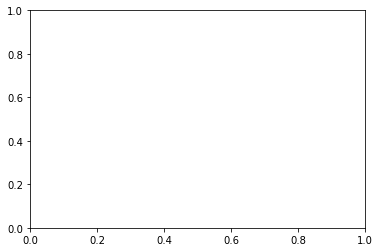

In [253]:
travel_class = titanic[titanic['pclass'] == 1]
plt.hist(travel_class['embarked'])


0      (20, 30]
1       (0, 10]
2       (0, 10]
3      (20, 30]
4      (20, 30]
5      (40, 50]
6      (60, 70]
7      (30, 40]
8      (50, 60]
9      (70, 80]
10     (40, 50]
11     (10, 20]
12     (20, 30]
13     (20, 30]
14     (70, 80]
16     (20, 30]
17     (40, 50]
18     (30, 40]
19     (30, 40]
20     (30, 40]
21     (40, 50]
22     (20, 30]
23     (40, 50]
24     (20, 30]
25     (20, 30]
26     (20, 30]
27     (10, 20]
28     (30, 40]
29     (20, 30]
30     (40, 50]
         ...   
289    (10, 20]
290    (50, 60]
291    (30, 40]
292    (40, 50]
294    (40, 50]
295    (10, 20]
296    (30, 40]
298    (30, 40]
299    (30, 40]
300    (60, 70]
301    (40, 50]
302    (30, 40]
303    (60, 70]
304    (50, 60]
305    (50, 60]
306    (50, 60]
307    (20, 30]
308    (50, 60]
309    (30, 40]
310    (50, 60]
311    (40, 50]
312    (40, 50]
313    (20, 30]
314    (40, 50]
315    (20, 30]
316    (50, 60]
317    (20, 30]
319    (30, 40]
321    (60, 70]
322    (30, 40]
Name: age, Length: 284, 

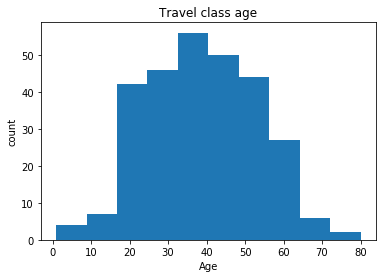

In [254]:
plt.hist(travel_class.age.dropna())
discrete_decade_age = pd.cut(travel_class.age.dropna(), [0,10,20,30,40,50,60,70,80,90,100])
print(discrete_decade_age)
plt.title('Travel class age')
plt.xlabel('Age')
plt.ylabel('count')

(array([  4.,   7.,  42.,  46.,  56.,  50.,  44.,  27.,   6.,   2.]),
 array([  0.9167 ,   8.82503,  16.73336,  24.64169,  32.55002,  40.45835,
         48.36668,  56.27501,  64.18334,  72.09167,  80.     ]),
 <a list of 10 Patch objects>)

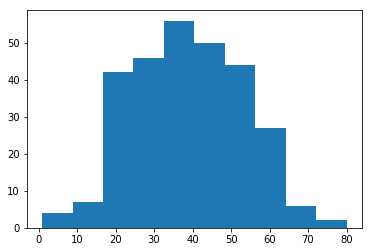

In [255]:
plt.hist(travel_class['age'].dropna())

#### Question 3

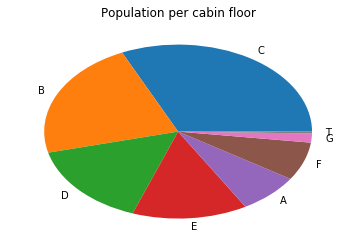

In [256]:
titanic_cabin_floor = titanic["cabin"].dropna().map(lambda x: x[0])
plt.pie(titanic_cabin_floor.value_counts(), labels = titanic_cabin_floor.value_counts().index)
plt.title('Population per cabin floor')


#### Question 4

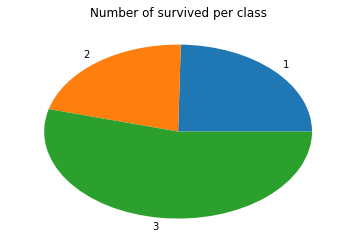

In [257]:
survived_per_class = titanic.groupby("pclass").count()["survived"]
plt.pie(survived_per_class, labels=survived_per_class.index)
plt.title('Number of survived per class')


#### Question 5

pclass  sex   
1       female    144
        male      179
2       female    106
        male      171
3       female    216
        male      493
Name: survived, dtype: int64


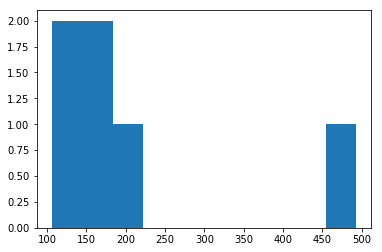

In [258]:
survived_per_class_sex = titanic.groupby(["pclass", "sex"]).count()["survived"]
plt.hist(survived_per_class_sex)
print(survived_per_class_sex)

#### Question 6

In [259]:
titanic["median_age"] = titanic.age > titanic.age.median()

In [268]:
titanic.groupby(["median_age", "sex", "pclass"]).count()

survived  name  age  sibsp  parch  ticket  fare  \
median_age sex    pclass                                                    
False      female 1             52    52   41     52     52      52    52   
                  2             59    59   56     59     59      59    59   
                  3            173   173  109    173    173     173   173   
           male   1             60    60   32     60     60      60    60   
                  2             87    87   74     87     87      87    87   
                  3            368   368  224    368    368     368   368   
True       female 1             92    92   92     92     92      92    92   
                  2             47    47   47     47     47      47    47   
                  3             43    43   43     43     43      43    43   
           male   1            119   119  119    119    119     119   119   
                  2             84    84   84     84     84      84    84   
                  3            125   125  125    125    125     125   124   

                          cabin  embarked  boat  body  home.dest  
median_age sex    pclass                                          
False      female 1          42        52    50     0         47  
                  2           7        59    49     0         59  
                  3           6       173    81     3         44  
           male   1          38        60    26     3         52  
                  2           7        87    18    10         78  
                  3           7       368    58    22         93  
True       female 1          79        90    88     0         74  
                  2           6        47    37     1         45  
                  3           1        43    14     4         19  
           male   1          97       119    37    32        116  
                  2           3        84     8    20         79  
                  3           2       125    20    26         39